<a href="https://colab.research.google.com/github/vogiahuan352/TTNT/blob/main/W4(fuzzy_logic)_24_2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=362a1ce47833c996253f6c755d8c66f65299b5afc486eacc1a27966dac341773
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


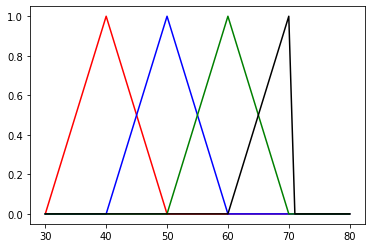

In [ ]:
x= np.arange(30, 81, 1)
slow=fuzz.trimf(x,[30, 40, 50])
medium=fuzz.trimf(x,[40,50,60])
medium_fast=fuzz.trimf(x,[50,60,70])
full_speed=fuzz.trimf(x,[60,70,70])
plt.figure()
plt.plot(x, slow, 'r',linewidth=1.5, label='slow')
plt.plot(x, medium, 'b',linewidth=1.5, label='medium')
plt.plot(x, medium_fast, 'g',linewidth=1.5, label='medium_fast')
plt.plot(x, full_speed, 'black',linewidth=1.5, label='full_speed')

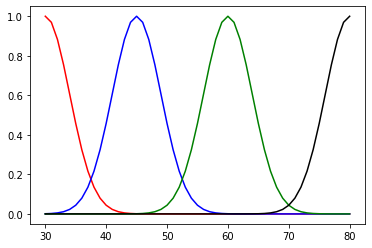

In [ ]:
x= np.arange(30, 81, 1)
slow=fuzz.gaussmf(x,30, 4)
medium=fuzz.gaussmf(x,45,4)
medium_fast=fuzz.gaussmf(x,60,4)
full_speed=fuzz.gaussmf(x,80,4)
plt.figure()
plt.plot(x, slow, 'r',linewidth=1.5, label='slow')
plt.plot(x, medium, 'b',linewidth=1.5, label='medium')
plt.plot(x, medium_fast, 'g',linewidth=1.5, label='medium_fast')
plt.plot(x, full_speed, 'black',linewidth=1.5, label='full_speed')

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

4.121951219512195


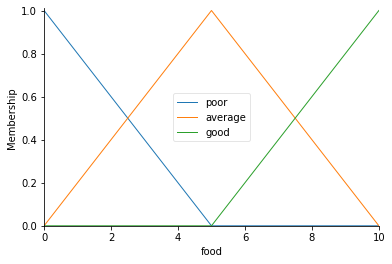

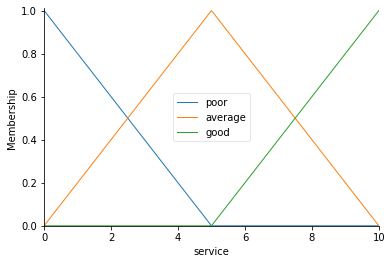

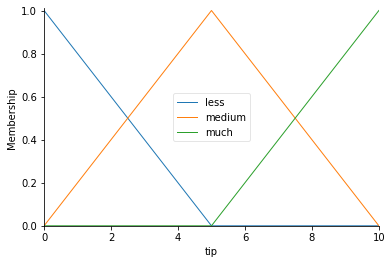

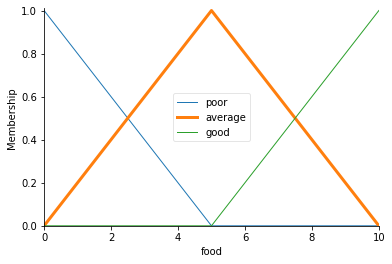

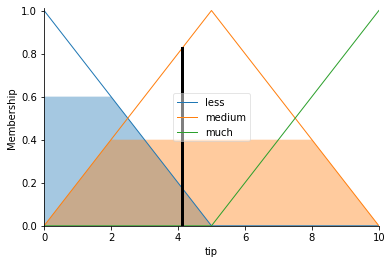

In [ ]:
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(0,11,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[0,0,5])
tip['medium']=fuzz.trimf(tip.universe,[0,5,10])
tip['much']=fuzz.trimf(tip.universe,[5,10,10])
food.view()
service.view()
tip.view()
food['average'].view()

rule1= ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2= ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3= ctrl.Rule(food['poor'] & service['good'], tip['much'])
rule4= ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5= ctrl.Rule(food['average'] & service['average'], tip['medium'])
rule6= ctrl.Rule(food['average'] & service['good'], tip['much'])
rule7= ctrl.Rule(food['good'] & service['poor'], tip['medium'])
rule8= ctrl.Rule(food['good'] & service['average'], tip['much'])
rule9= ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=3
tipping.input['service']=2
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)